In [ ]:
pip install "numpy<2" --force-reinstall


In [ ]:
pip install -U jupyter ipykernel

In [1]:
# Import des biblioth√®ques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:

# Chargement du dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]




In [3]:
df.shape

(150, 5)

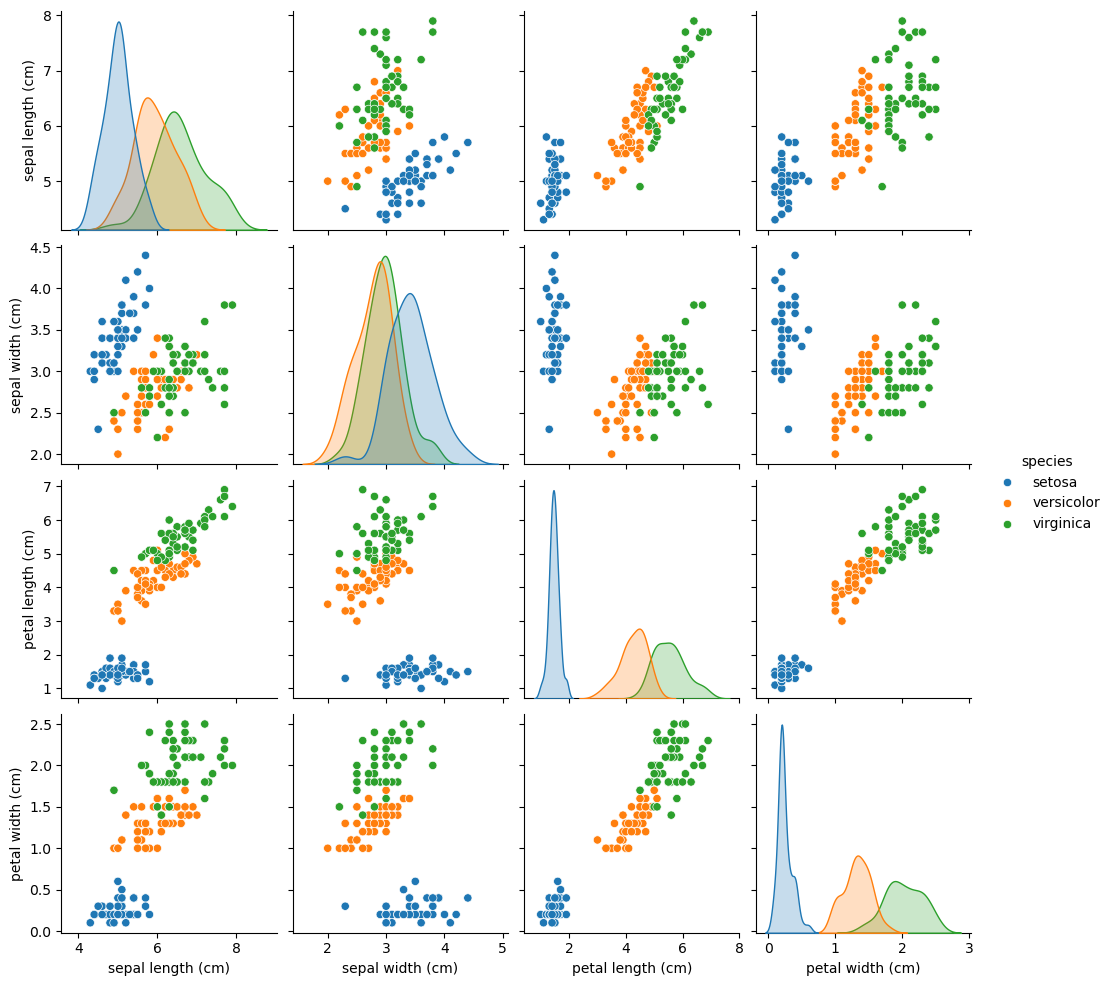

In [4]:

# Visualisation
sns.pairplot(df, hue='species')
plt.show()



In [5]:
# Aper√ßu
df.head()



sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [4]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Mod√®le KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Pr√©diction
y_pred = knn.predict(X_test)

In [7]:
# √âvaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc:.2f}")

Accuracy : 1.00


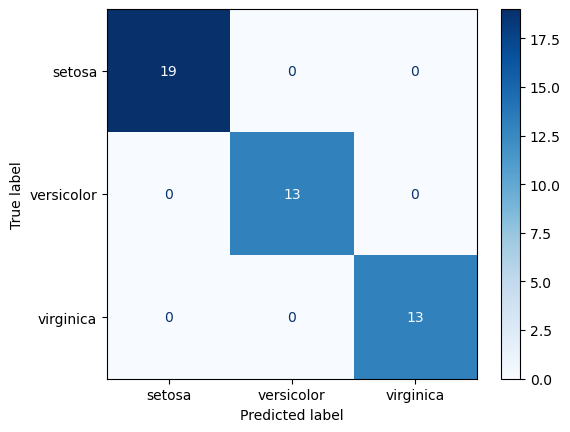

In [8]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()


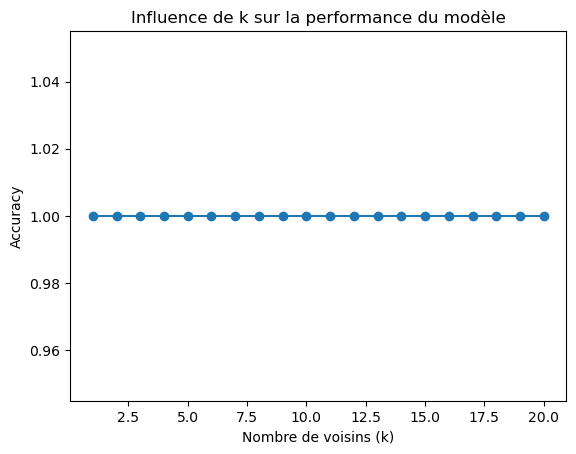

In [9]:
# Analyse de la performance en fonction de k
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), scores, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy')
plt.title('Influence de k sur la performance du mod√®le')
plt.show()

### Decision Boundaries of KNN on the Iris Dataset

In [11]:
# ==============================================
# Decision Boundaries of KNN on Iris Dataset
# ==============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use first two features for 2D visualization (sepal length, sepal width)
y = iris.target
target_names = iris.target_names



In [12]:
# 2. Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [13]:
# 3. Create a KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn.fit(X_std, y)


KNeighborsClassifier()

In [14]:
# 4. Create a mesh grid for decision boundary visualization
h = .02  # step size in the mesh
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [15]:
# 5. Predict class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

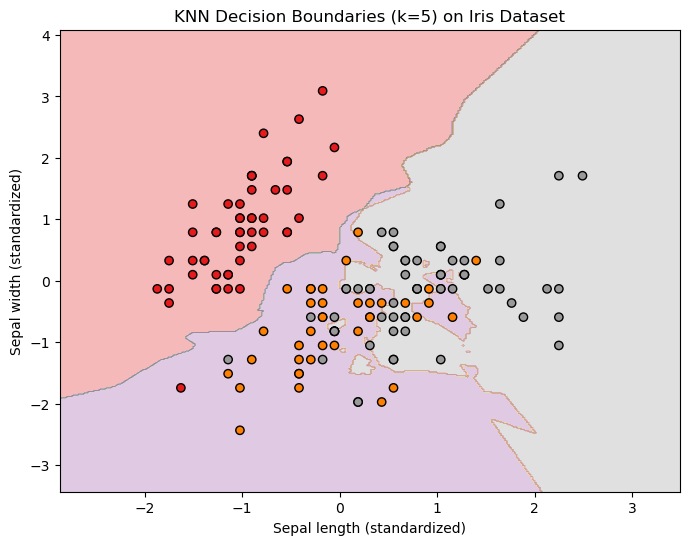

In [17]:
# 6. Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title(f'KNN Decision Boundaries (k={k}) on Iris Dataset')
plt.savefig('KNN Decision Boundaries on Iris Dataset.png', dpi=300)
plt.show()

### Reduce overfitting

1. **KNN is extremely sensitive to overfitting**.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


2. Cross Validation to choose the best k
    * Use a  GridSearch with cross-validation :

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)


Best parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best cross-val accuracy: 0.9428571428571428


**Remark** : Effect automatic selection of the optimal ùëò value and the most stable distance metric.